<a href="https://colab.research.google.com/github/kbee181756/DS-Unit-1-Sprint-2-Statistics/blob/master/Build_a_Confidence_Interval_House_Votes_chisquare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"

In [0]:
house_votes = pd.read_csv(url)

In [4]:
house_votes

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
430,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
431,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
432,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [0]:
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']
house_votes = pd.read_csv(url, header=None, names=column_headers, na_values="?")

In [6]:
house_votes.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [7]:
house_votes = house_votes.replace({'y': 1, 'n': 0})
house_votes.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [8]:
house_votes['party'].value_counts()

democrat      267
republican    168
Name: party, dtype: int64

In [9]:
rep_votes = house_votes[house_votes['party'] == 'republican']
rep_votes.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [10]:
dem_votes = house_votes[house_votes['party'] == 'democrat']
dem_votes.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [11]:
print(rep_votes["synfuels"].mean())
print(dem_votes['synfuels'].mean())

0.1320754716981132
0.5058823529411764


In [12]:
print(rep_votes.sum())
dem_votes.sum()

party                   republicanrepublicanrepublicanrepublicanrepubl...
handicapped-infants                                                    31
water-project                                                          75
budget                                                                 22
physician-fee-freeze                                                  163
el-salvador-aid                                                       157
religious-groups                                                      149
anti-satellite-ban                                                     39
aid-to-contras                                                         24
mx-missile                                                             19
immigration                                                            92
synfuels                                                               21
education                                                             135
right-to-sue                          

party                   democratdemocratdemocratdemocratdemocratdemocr...
handicapped-infants                                                   156
water-project                                                         120
budget                                                                231
physician-fee-freeze                                                   14
el-salvador-aid                                                        55
religious-groups                                                      123
anti-satellite-ban                                                    200
aid-to-contras                                                        218
mx-missile                                                            188
immigration                                                           124
synfuels                                                              129
education                                                              36
right-to-sue                          

In [13]:
rep_votes["synfuels"].sum()/len(rep_votes)

0.125

In [14]:
dem_votes["synfuels"].sum()/len(dem_votes)

0.48314606741573035

In [0]:
dem_votes_fuels = dem_votes['synfuels']
dem_votes_fuels = dem_votes_fuels[~np.isnan(dem_votes_fuels)]

In [16]:
print(len(dem_votes_fuels))

255


In [17]:
rep_votes_fuels = rep_votes['synfuels']
rep_votes_fuels = rep_votes_fuels[~np.isnan(rep_votes_fuels)]
print(len(rep_votes_fuels))

159


In [0]:
rep_fuel_mean = (rep_votes["synfuels"].mean())
dem_fuel_mean = (dem_votes['synfuels'].mean())

In [19]:
rep_votes["synfuels"].sum()/len(rep_votes_fuels)

0.1320754716981132

In [20]:
dem_votes["synfuels"].sum()/len(dem_votes_fuels)

0.5058823529411764

In [0]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [22]:
ttest_ind(rep_votes['synfuels'], dem_votes['synfuels'], nan_policy='omit')

Ttest_indResult(statistic=-8.293603989407588, pvalue=1.5759322301054064e-15)

In [23]:
results = ttest_ind(rep_votes['synfuels'], dem_votes['synfuels'], nan_policy='omit')

print(results[1])
print('{:f}'.format(results[1]))
print('{:.15f}'.format(results[1]))

1.5759322301054064e-15
0.000000
0.000000000000002


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


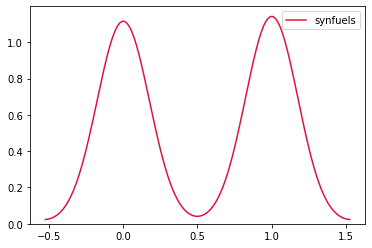

In [24]:
sns.kdeplot(dem_votes["synfuels"], color="crimson");

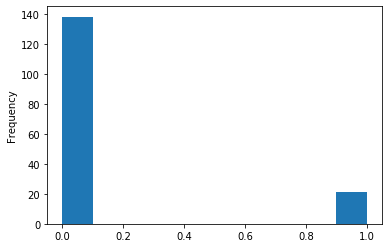

In [25]:
rep_votes['synfuels'].plot(kind='hist')

In [26]:
rep_votes.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,165.000000,148.000000,164.000000,165.000000,165.000000,166.000000,162.000000,157.000000,165.000000,165.000000,159.000000,155.000000,158.000000,161.000000,156.000000,146.000000
mean,0.187879,0.506757,0.134146,0.987879,0.951515,0.897590,0.240741,0.152866,0.115152,0.557576,0.132075,0.870968,0.860759,0.981366,0.089744,0.657534
std,0.391804,0.501652,0.341853,0.109760,0.215442,0.304104,0.428859,0.361010,0.320176,0.498186,0.339643,0.336322,0.347298,0.135649,0.286735,0.476168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
rep_votes.T

,0,1,7,8,10,11,14,15,18,28,30,33,35,36,37,38,49,51,53,55,56,57,58,59,61,65,66,67,71,73,79,82,83,84,86,87,89,99,106,107,...,339,340,343,345,346,347,349,351,353,355,356,357,359,363,364,369,374,377,378,379,392,393,399,400,401,402,403,404,405,409,410,412,413,416,420,427,430,432,433,434
party,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,...,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican
handicapped-infants,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,NaN,0,0,0,NaN,0,1,0,0,0,0,1,1,1,0,0,0,0,0
water-project,1,1,1,1,1,1,1,1,1,0,1,1,1,NaN,1,1,NaN,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,NaN,0,0,0,0,1,NaN,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,0,1,NaN,1,1,1,0,1,1,0,0,0,0,1,1,1,0,0,NaN,0,1
budget,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,NaN,...,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0
physician-fee-freeze,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
el-salvador-aid,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,NaN,...,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,NaN,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
religious-groups,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,NaN,...,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
anti-satellite-ban,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,NaN,...,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,NaN,0
aid-to-contras,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN,...,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,NaN,0,0,0,1,0,NaN,0,1,0,0,0,0,0,0,1,0,1,1,0,0,NaN,0
mx-missile,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,NaN,...,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,NaN,0


In [0]:
xxx = pd.DataFrame(rep_votes).T

In [29]:
xxx.head()

,0,1,7,8,10,11,14,15,18,28,30,33,35,36,37,38,49,51,53,55,56,57,58,59,61,65,66,67,71,73,79,82,83,84,86,87,89,99,106,107,...,339,340,343,345,346,347,349,351,353,355,356,357,359,363,364,369,374,377,378,379,392,393,399,400,401,402,403,404,405,409,410,412,413,416,420,427,430,432,433,434
party,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,...,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican,republican
handicapped-infants,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,NaN,0,0,0,NaN,0,1,0,0,0,0,1,1,1,0,0,0,0,0
water-project,1,1,1,1,1,1,1,1,1,0,1,1,1,NaN,1,1,NaN,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,NaN,0,0,0,0,1,NaN,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,0,1,NaN,1,1,1,0,1,1,0,0,0,0,1,1,1,0,0,NaN,0,1
budget,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,NaN,...,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0
physician-fee-freeze,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [36]:
new_frame = pd.crosstab(house_votes['synfuels'], house_votes['crime'])
new_frame

crime,0.0,1.0
synfuels,,
0.0,92,165
1.0,72,73


In [55]:
from scipy.stats import chi2_contingency

chi2_contingency(new_frame)

(6.80757873202918,
 0.009077176572414383,
 1,
 array([[104.84577114, 152.15422886],
        [ 59.15422886,  85.84577114]]))

In [0]:
import scipy.stats as stats

In [0]:
def confidence_interval(data, confidence=0.95):
  data_array  = np.array(data)
  data_mean = np.mean(data)
  n = len(data)
  stderr = np.std(data_array, ddof=1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1 + confidence) / 2, n-1)
  return (data_mean, data_mean - moe, data_mean + moe)

In [62]:
confidence_interval(dem_votes['synfuels'].dropna())

(0.5058823529411764, 0.4441027014712158, 0.5676620044111371)

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

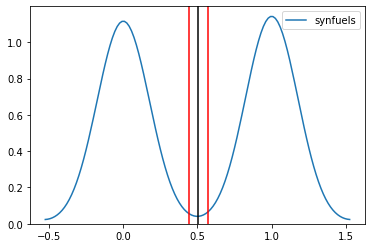

In [66]:
sns.kdeplot(dem_votes["synfuels"].dropna())
CI = confidence_interval(dem_votes["synfuels"].dropna())
plt.axvline(x=CI[1], color = 'r')
plt.axvline(x=CI[2], color = 'r')
plt.axvline(x=CI[0], color = 'k');